In [91]:
#from uts_ad import residual_outlier_detection
#from uts_ad import plot_anomaly_data22
from uts_ad import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as randn
import seaborn as sns
from matplotlib.dates import DateFormatter
%matplotlib inline



In [92]:
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

In [93]:
df = pd.read_csv('BTC-USD.csv', sep= ',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792
2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063,41441.164063,19652846215


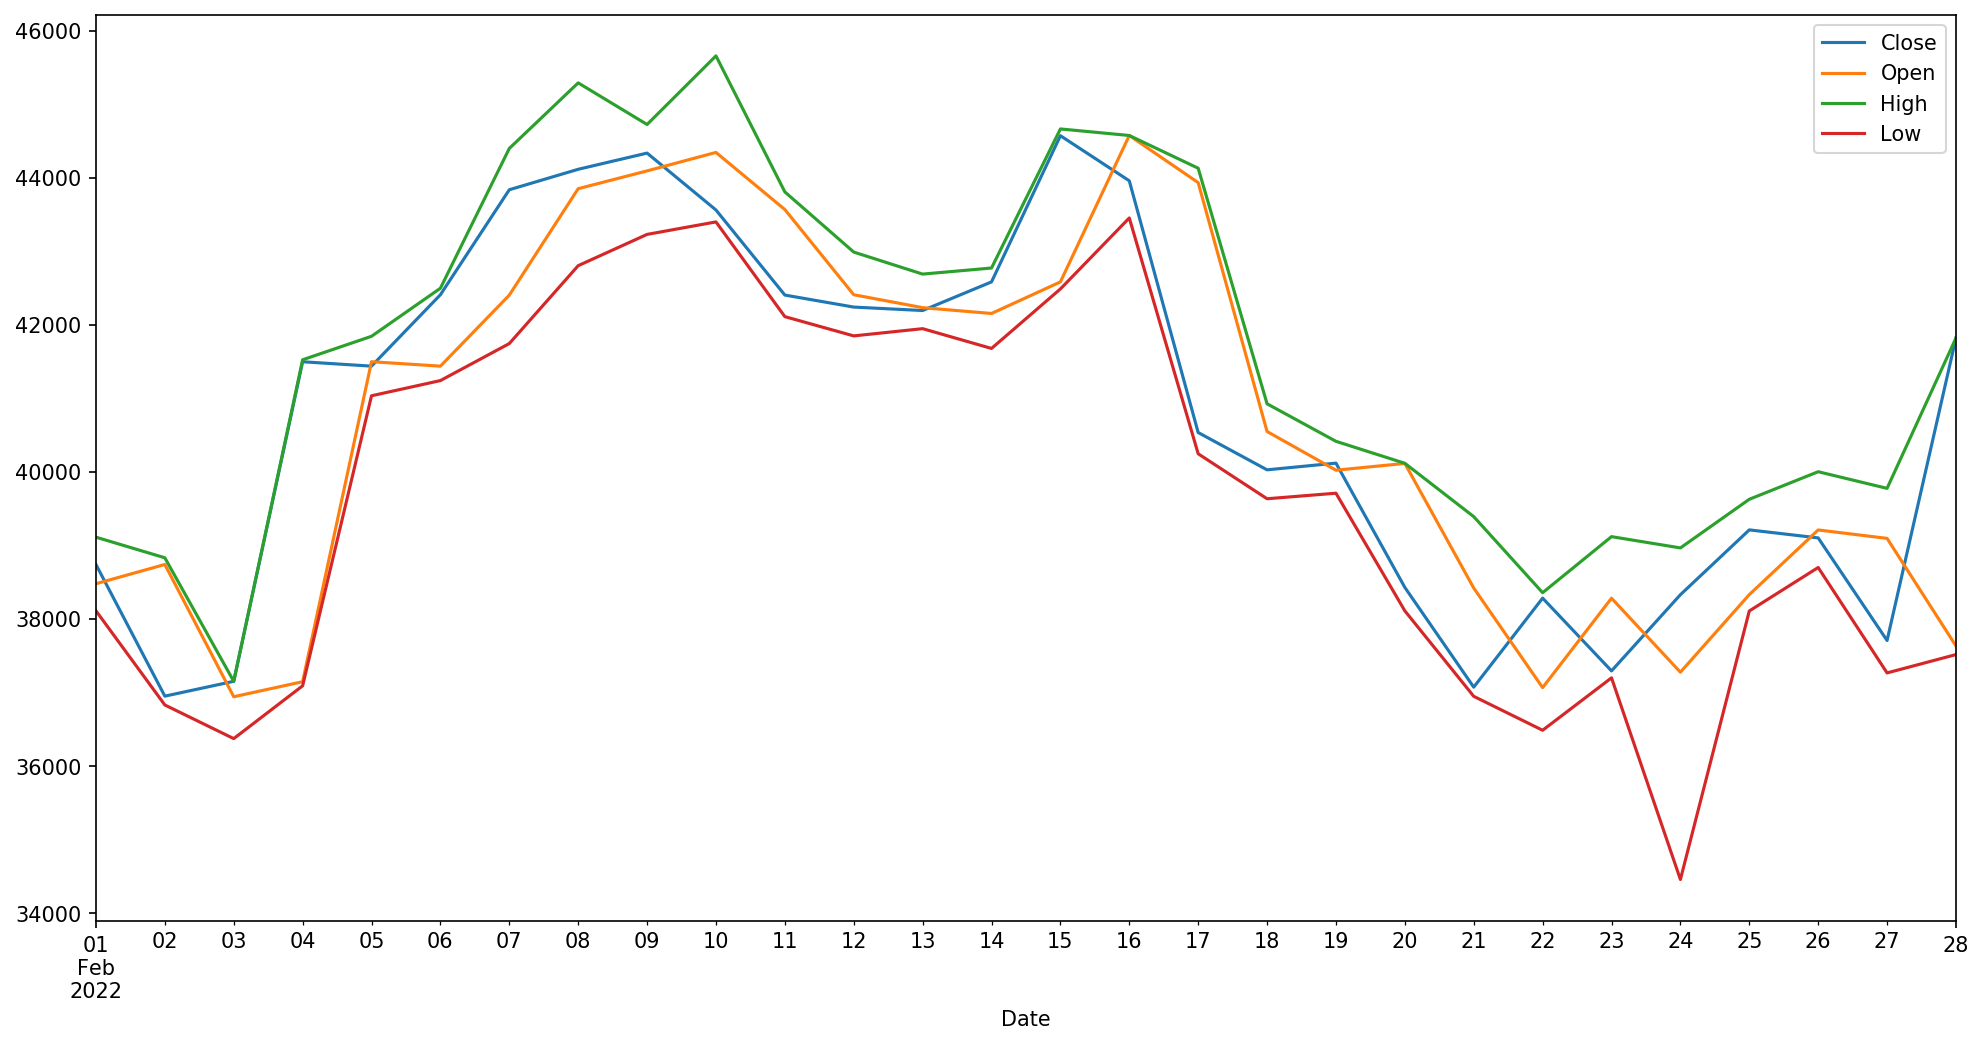

In [42]:
plt.figure(figsize=(16, 8), dpi=150)
df['Close'].plot()
df['Open'].plot()
df['High'].plot()
df['Low'].plot()
plt.legend()

In [175]:
pp= residual_outlier_detection(df['Low'],20, 1.5)
df['Low'][pp]

Date
2022-02-02    36832.730469
2022-02-03    36375.539063
2022-02-22    36488.933594
2022-02-24    34459.218750
Name: Low, dtype: float64

In [176]:
df['Low'].head()

Date
2022-02-01    38113.664063
2022-02-02    36832.730469
2022-02-03    36375.539063
2022-02-04    37093.628906
2022-02-05    41038.097656
Name: Low, dtype: float64

In [177]:
# Outlier plot

# Plot min anomalies
series = df['Low']
outlier_df = df[pp]['Low']
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

In [63]:
series.index

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [64]:
outlier_df.index

DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-22', '2022-02-24'], dtype='datetime64[ns]', name='Date', freq=None)

In [178]:
# Plot  anomalies
series = df['Low']
outlier_df = df['Low'][pp]
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

fig.update_layout(
    title="Actual data points vs Anomaly data points",
    xaxis_title="Water Flow",
    yaxis_title="Time Periods",    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

fig.show()

In [65]:
df[pp]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
2022-02-22,37068.769531,38359.855469,36488.933594,38286.027344,38286.027344,25493150450
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093


In [179]:
dfcol = ['Open', 'High', 'Low', 'Close']
outlier_list = []
for col in dfcol:    
    pp= residual_outlier_detection(df[col],20, 1.5)
    pp=df[col][pp]
    outlier_list.append(pp)
outlier_list
    


[Date
 2022-02-03    36944.804688
 2022-02-04    37149.265625
 2022-02-22    37068.769531
 2022-02-24    37278.566406
 Name: Open, dtype: float64, Date
 2022-02-03    37154.601563
 2022-02-22    38359.855469
 Name: High, dtype: float64, Date
 2022-02-02    36832.730469
 2022-02-03    36375.539063
 2022-02-22    36488.933594
 2022-02-24    34459.218750
 Name: Low, dtype: float64, Date
 2022-02-02    36952.984375
 2022-02-03    37154.601563
 2022-02-21    37075.281250
 2022-02-23    37296.570313
 Name: Close, dtype: float64]

In [180]:
# Plot  anomalies
outlier_df =outlier_list[1]
series = df['High']
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

fig.update_layout(
    title="Actual data points vs Anomaly data points",
    xaxis_title="Water Flow",
    yaxis_title="Time Periods",    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

fig.show()


In [99]:
series

Date
2022-02-03    36944.804688
2022-02-04    37149.265625
2022-02-22    37068.769531
2022-02-24    37278.566406
Name: Open, dtype: float64

In [173]:
for i, (xx, yy) in enumerate(zip(dfcol, outlier_list)):
               
      # Plot  anomalies
      outlier_df =outlier_list[i]
      series = df[xx]
      
      fig = go.Figure()
         # Add outlier_df trace
      fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                        mode='markers',
                        name='Outliers Points'))
         
         #Add df trace
      fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                        name='Actual Data'))

      fig.update_layout(
         title="Actual data points vs Anomaly data points",
         xaxis_title= "Date",
         yaxis_title= str(xx),    
         font=dict(
            family="Courier New, monospace",
            size=12,
            color="RebeccaPurple"))

      fig.show()
         
    
    
    
    
    

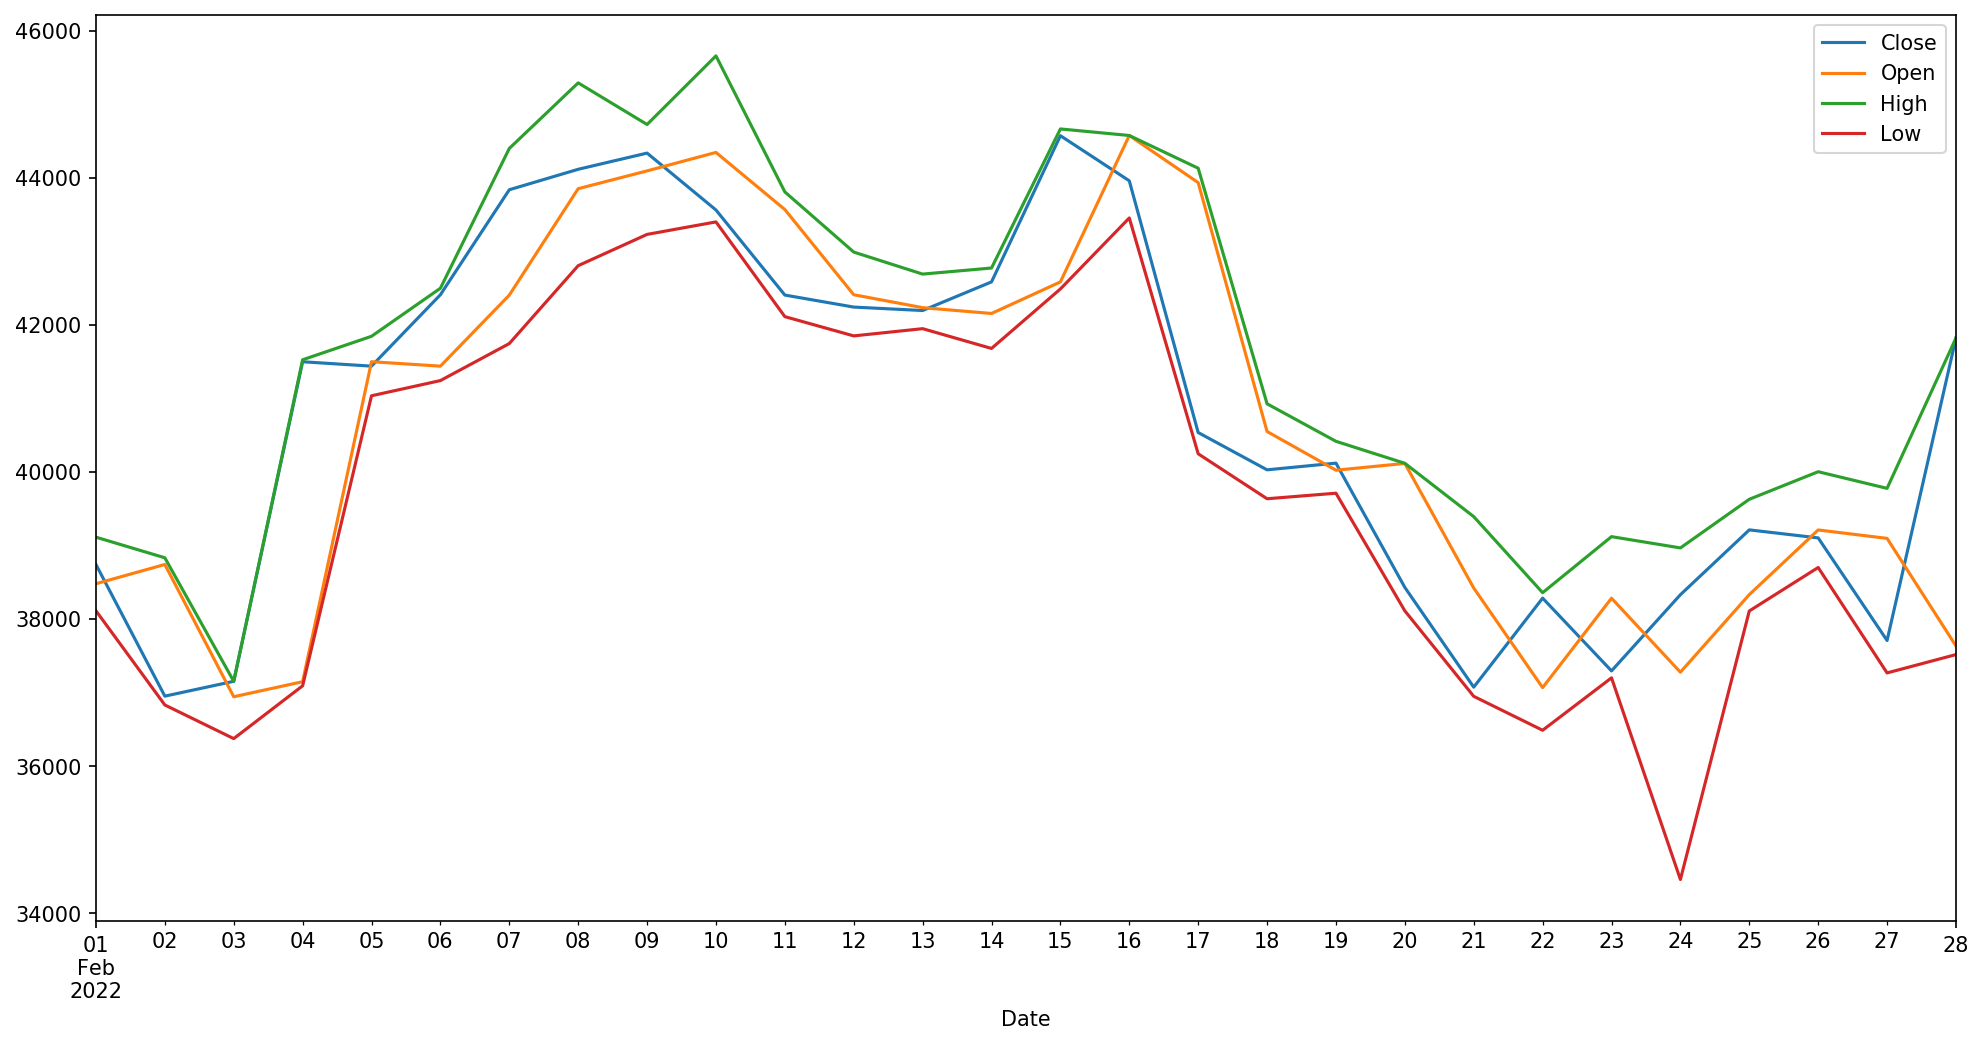

In [182]:
plt.figure(figsize=(16, 8), dpi=150)
df['Close'].plot()
df['Open'].plot()
df['High'].plot()
df['Low'].plot()
plt.legend()

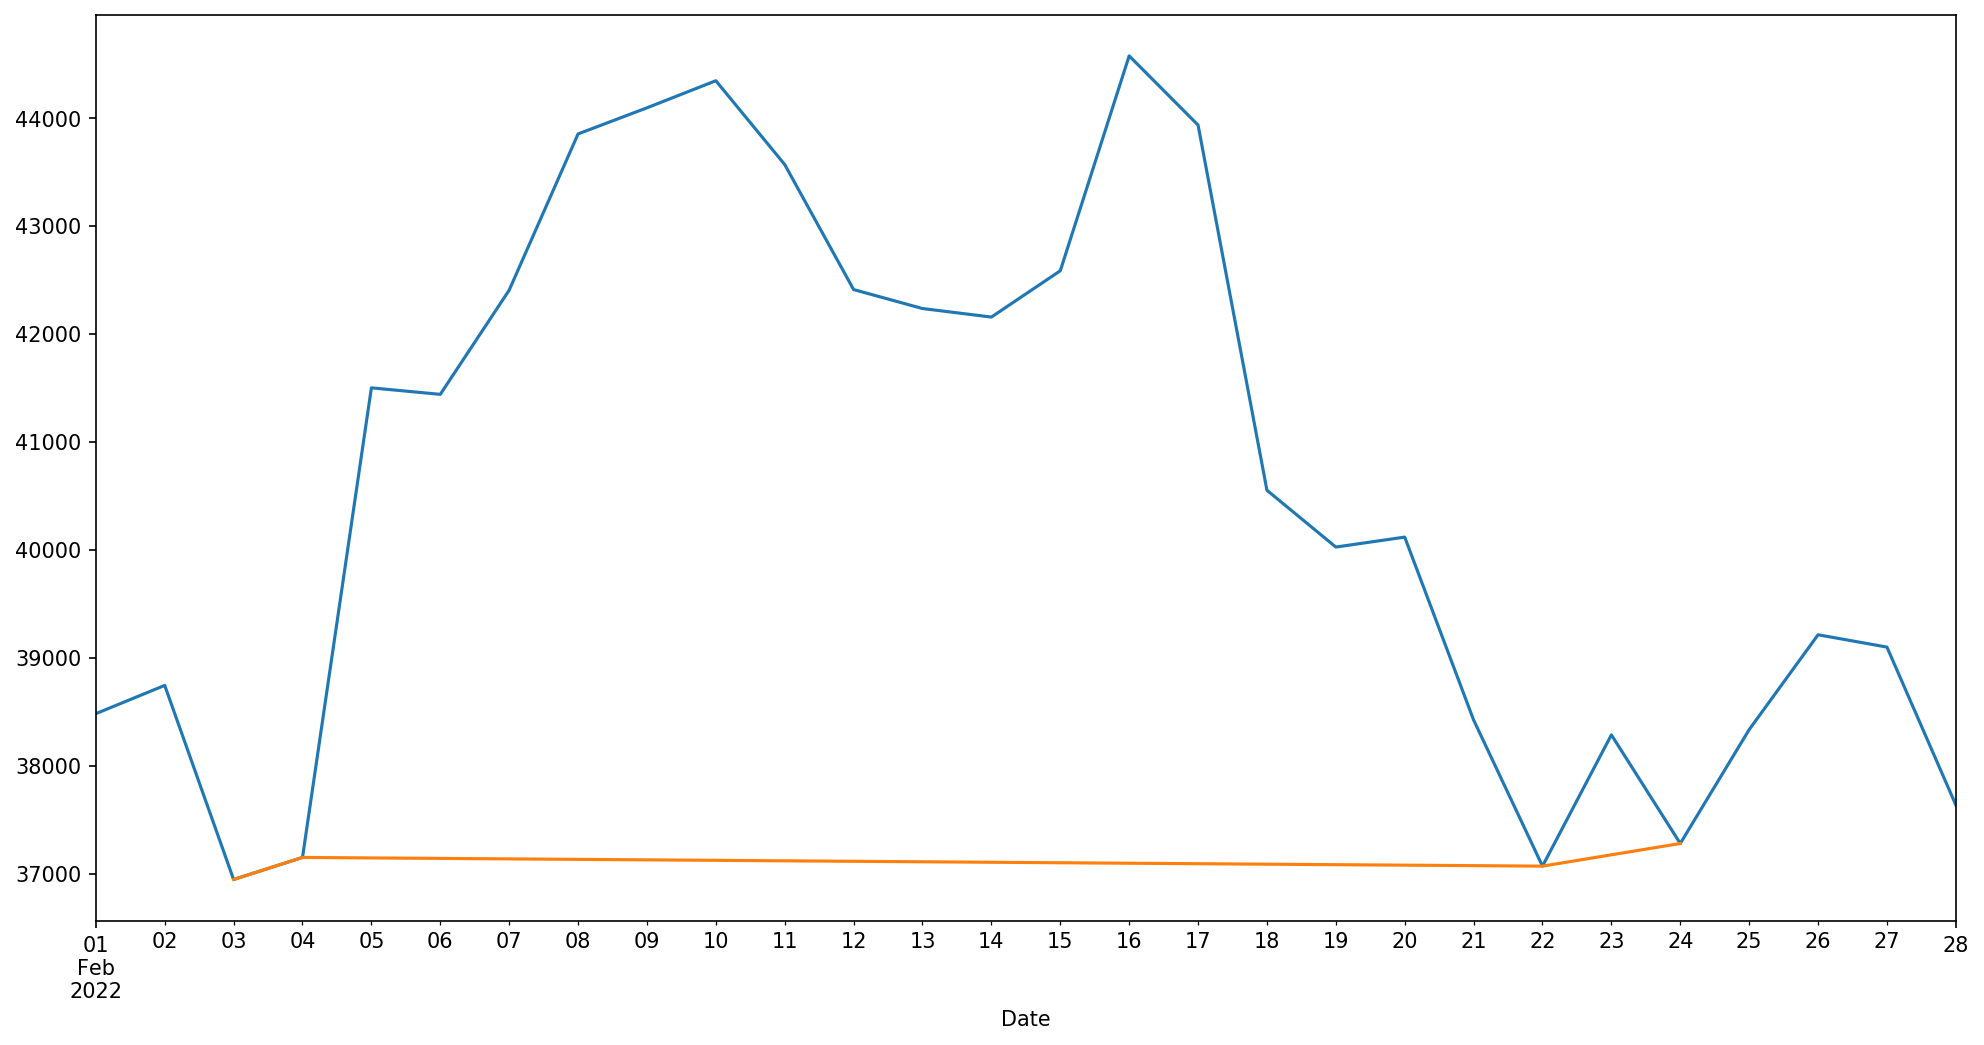

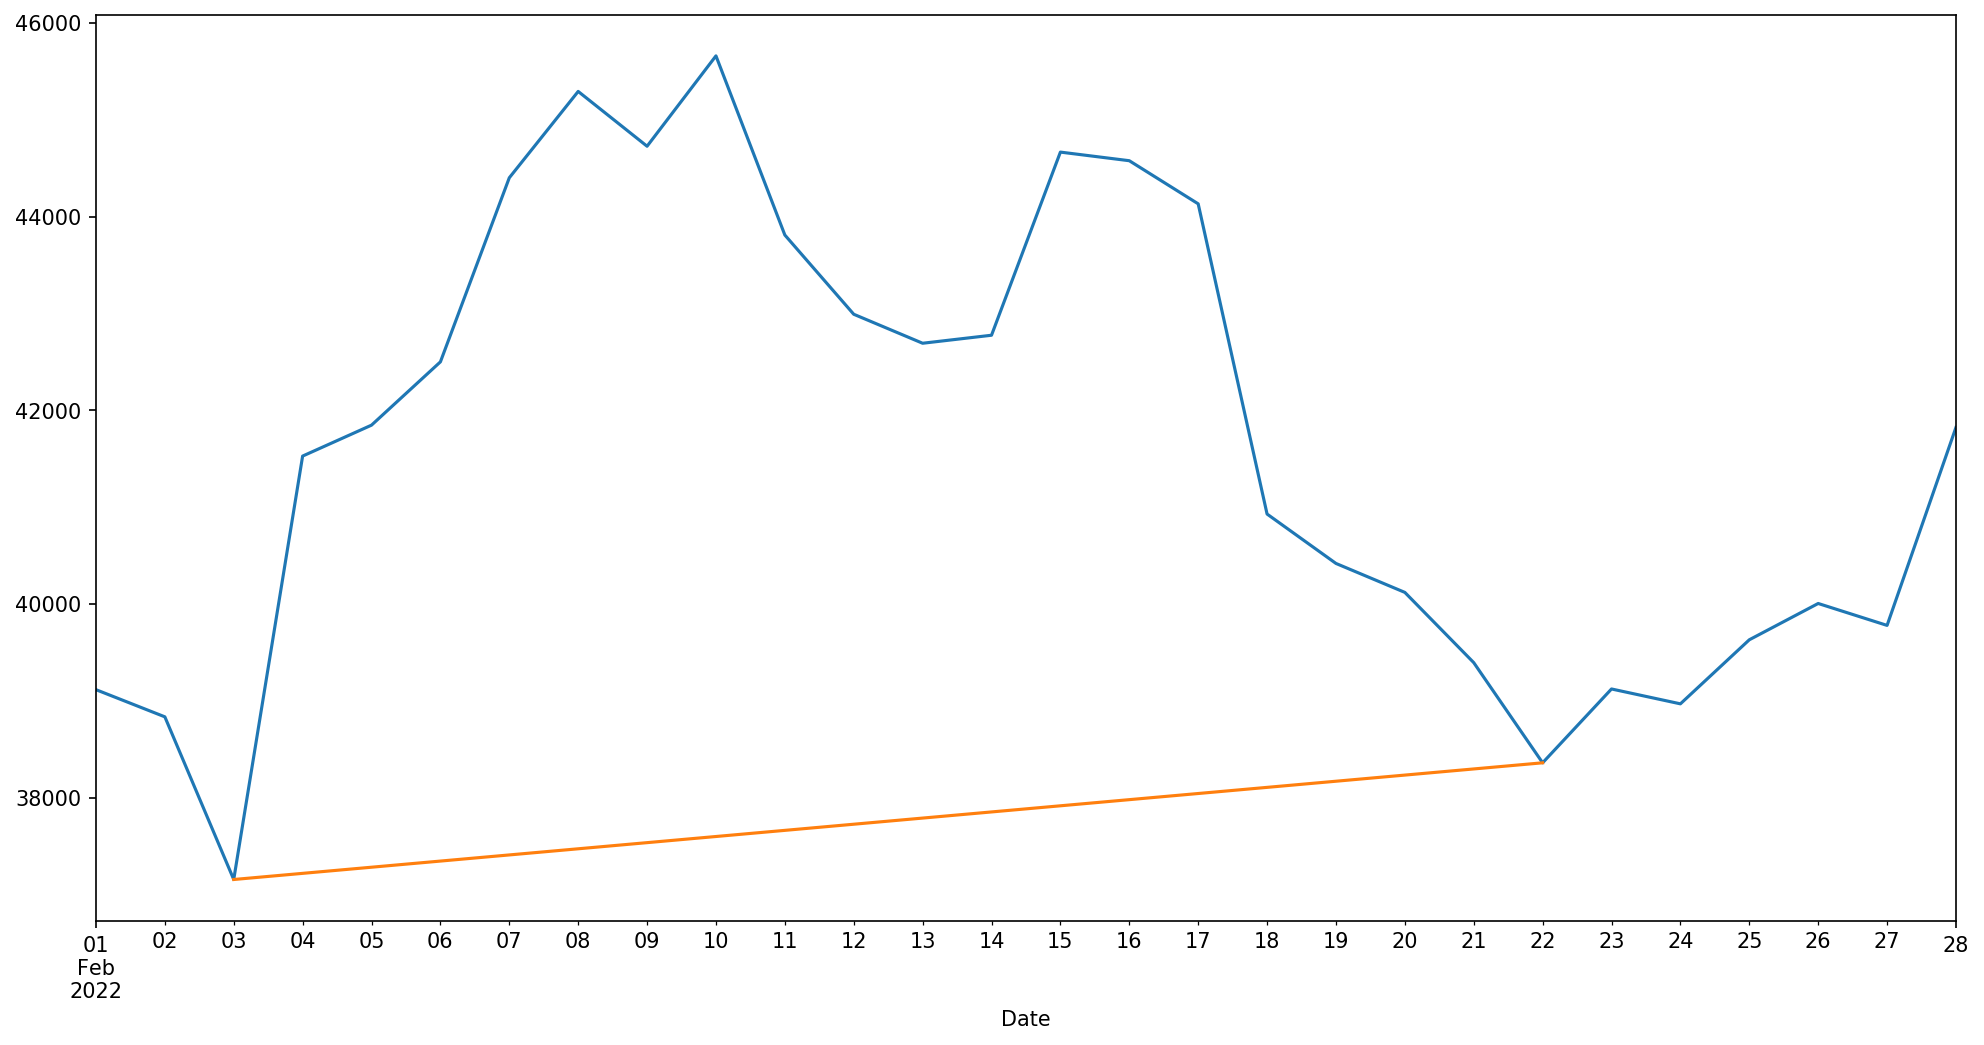

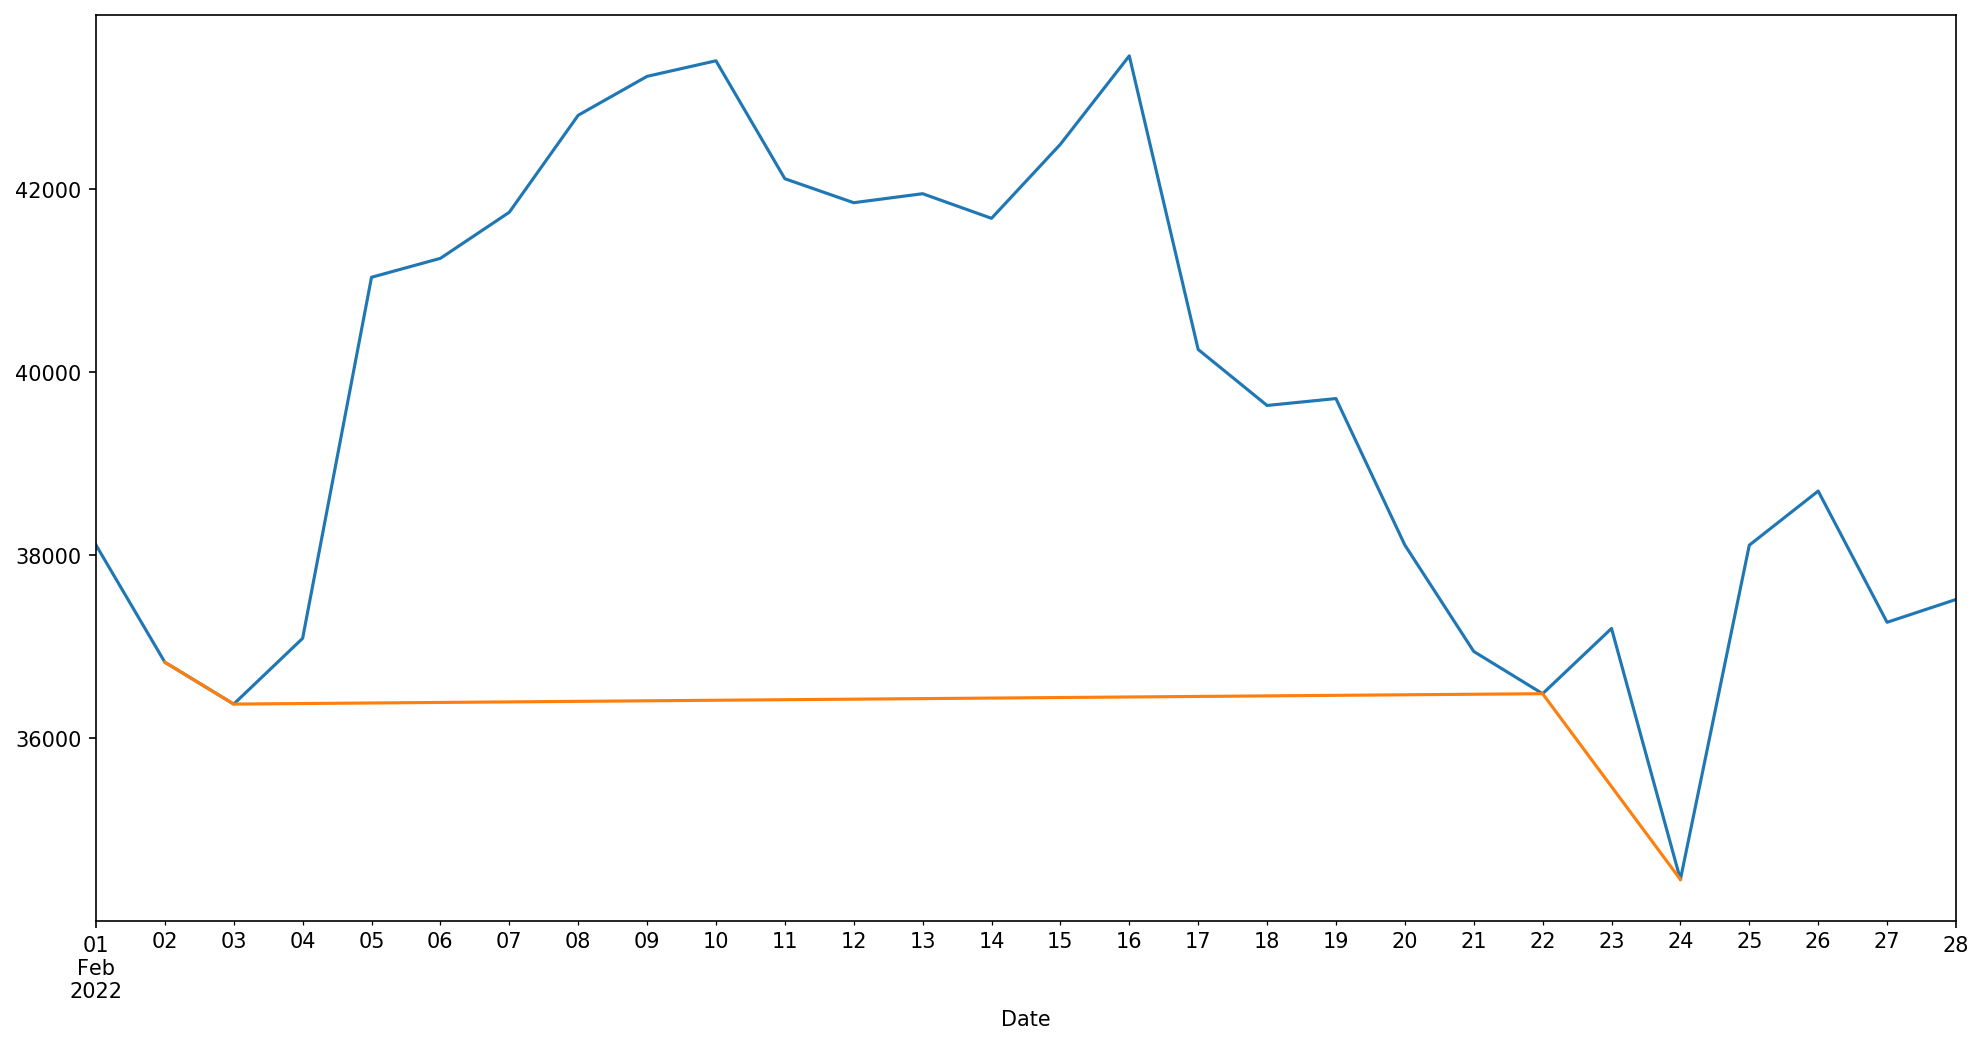

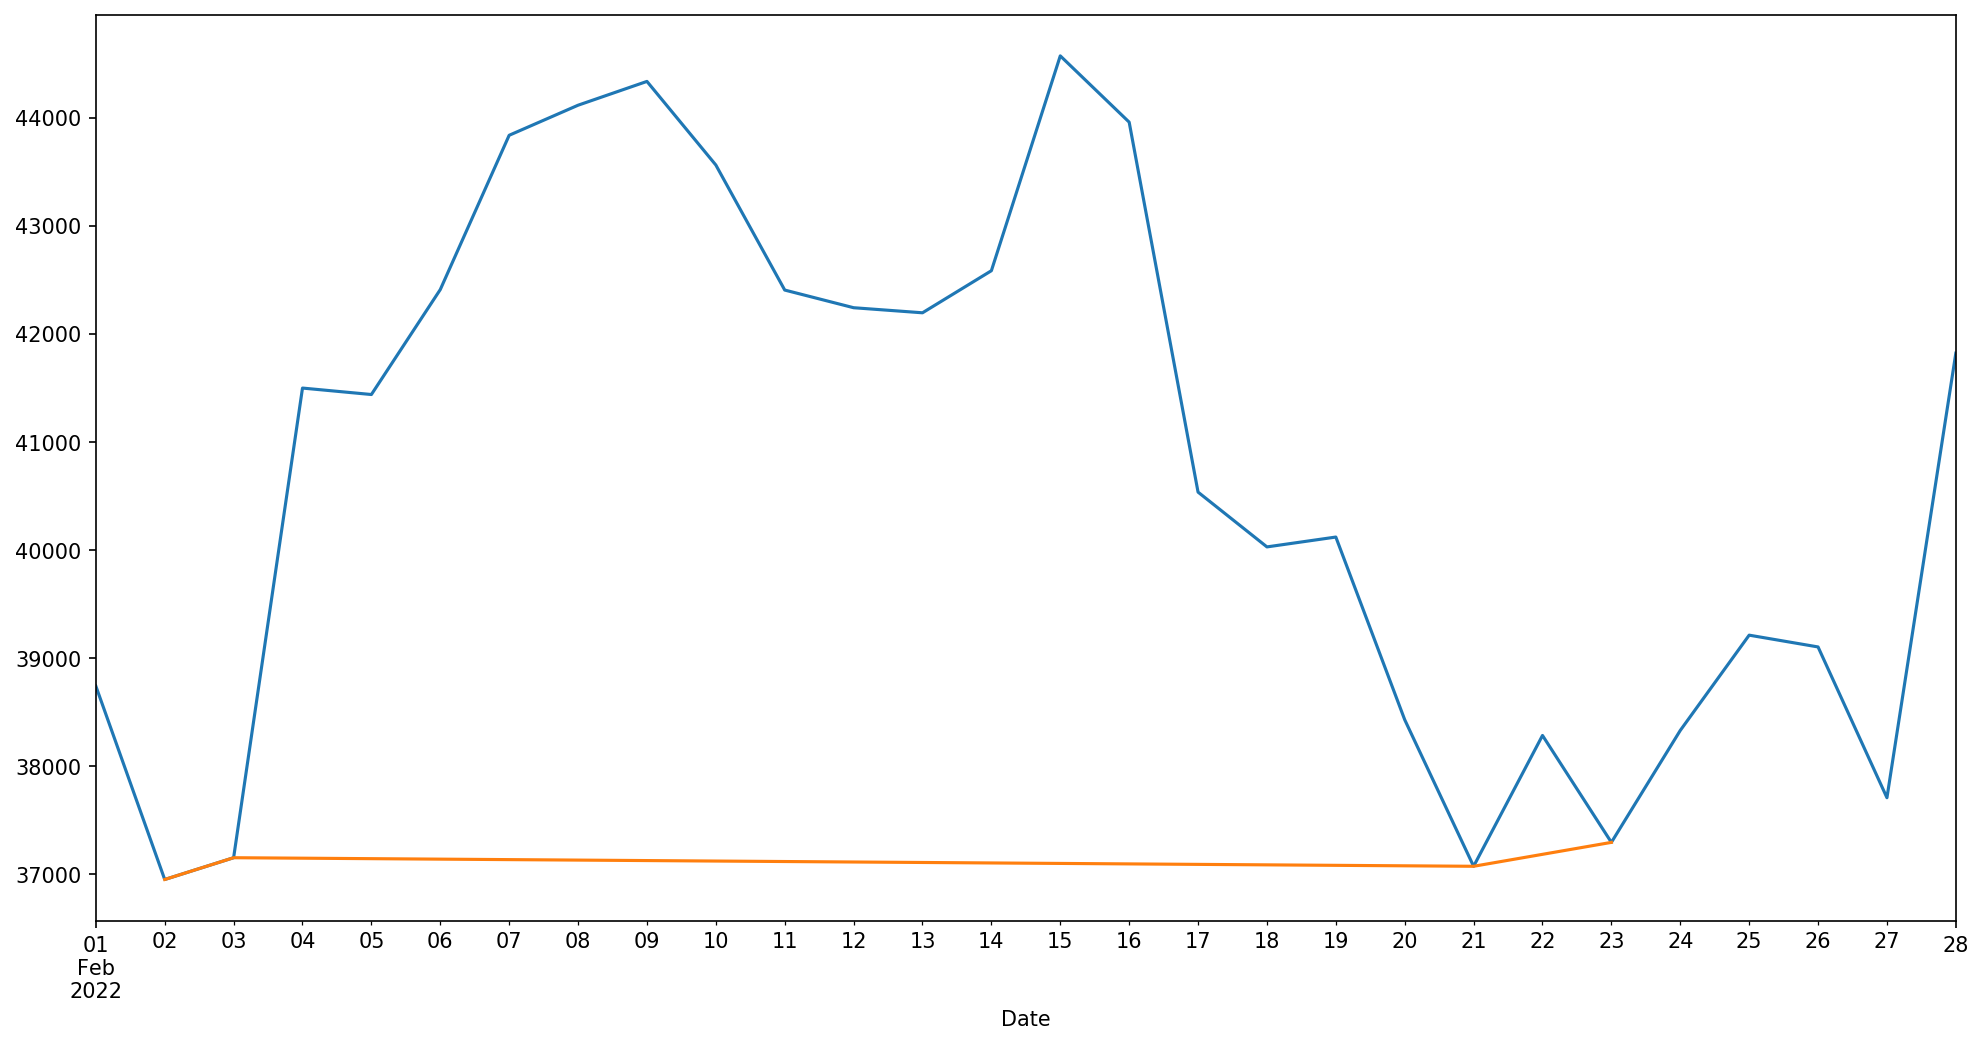

In [183]:
# Alternative way 
df2 =df.iloc[:,0:4]
outlier_list2 = []
for col in df2.columns:    
    pp2= residual_outlier_detection(df2[col],20, 1.5)
    pp2=df2[col][pp2]
    outlier_list2.append(pp2)
outlier_list2

for i, (xx, yy) in enumerate(zip(df2.columns, outlier_list2)):
               
      # Plot  anomalies
      outlier_df =outlier_list[i]
      series = df2[xx]
      plt.figure(figsize=(16, 8), dpi=150)
      series.plot()
     
      outlier_df.plot()   
    
      
   


In [184]:
#plt.figure(figsize=(16, 8), dpi=150)
#df2['Open'].plot()
#outlier_list2[0].plot()
#df2['High'].plot()
#outlier_list2[1].plot()
#df2['Low'].plot()
#outlier_list2[2].plot()
#df2['Close'].plot()
#outlier_list2[3].plot()

In [171]:
df2.head()

,Open,High,Low,Close
Date,,,,
2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375
2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000
2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063


In [172]:

# Plot  anomalies for Open
series = df2['Open']
outlier_df = outlier_list2[0]
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

   # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_list2[1].index, y = outlier_list2[1],
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = df2['High'].index, y = df2['High'], mode = 'lines',
                    name='Actual Data'))

   # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_list2[2].index, y = outlier_list2[2],
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = df2['Low'].index, y = df2['Low'], mode = 'lines',
                    name='Actual Data'))
   # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_list2[3].index, y = outlier_list2[3],
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = df2['Close'].index, y = df2['Close'], mode = 'lines',
                    name='Actual Data'))

fig.update_layout(
    title="Actual data points vs Anomaly data points",
    xaxis_title="Water Flow",
    yaxis_title="Time Periods",    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

fig.show()